In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

#df = pd.read_csv(r"C:\Users\Vedant123\Downloads\datasets\diabetes.csv")
#df.head()

print(df.shape)
print(df.columns)


(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
# View first few rows
df.head()

# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

df = df.dropna()  # or df.fillna(df.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

In [7]:
X = df[['BMI']]        # independent variable
y = df['Glucose']      # dependent variable


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (Slope): 0.849077698703079
Intercept: 93.69866770099132


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Residual Sum of Squares (RSS)
RSS = np.sum((y_test - y_pred) ** 2)
print("Residual Sum of Squares (RSS):", RSS)

# Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R²):", r2)


Residual Sum of Squares (RSS): 143244.61785317335
Coefficient of Determination (R²): 0.07567172141031397


Matplotlib is building the font cache; this may take a moment.


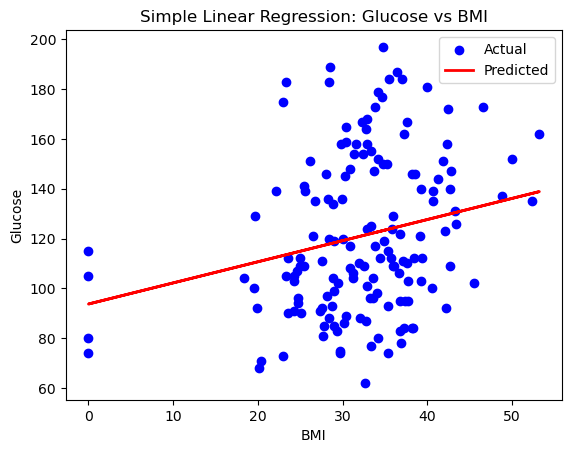

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Simple Linear Regression: Glucose vs BMI')
plt.legend()
plt.show()
